In [4]:
import pandas as pd
import numpy as np
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [27]:
df = pd.read_csv(r'C:\Users\CPE\Downloads\ACPs_Breast_cancer.csv')
df_ = df.drop(columns = ['ID', 'class'])

In [28]:
df2 = pd.read_csv(r'C:\Users\CPE\Downloads\ACPs_Lung_cancer.csv')
df__ = df2.drop(columns = ['ID', 'class'])

In [347]:
df3 = pd.read_csv(r'C:\Users\CPE\ensembl-pep.csv')
df3

,name,seq
0,FBtr0005088.1,MAASDKSVDDSLYPIAVLIDELKNEDVQLRLNSIKKLSTIALALGE...
1,FBtr0006151.1,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...
2,FBtr0070000.1,MTRYKQTEFTEDDSSSIGGIQLNEATGHTGMQIRYHTARATWNWRS...
3,FBtr0070002.1,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...
4,FBtr0070003.1,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...
...,...,...
30313,FBtr0347288.1,MDCSLQDALDNEYLVWNKGDHRENQMMLIRETVQTTLLLVLMIEVM...
30314,FBtr0347289.1,MDCSLQDALDNEYLVWNKGDHRENQMMLIRETVQTTLLLVLMIEVM...
30315,FBtr0347290.1,MQDQSRWPVRNFLIPSPSIFFILIWRITVQMMYPYGYMDCSLQDAL...
30316,FBtr0347302.1,MCGRRLLFLAAFGCLLANAFSLPATRNEEFDDGFPESEFDYEERHT...


In [348]:
df3.rename(columns = {'seq':'sequence'}, inplace = True)
df___ = df3.drop(columns = ['name'])

In [349]:
full_data = pd.concat([df___], axis = 0)
full_data

,sequence
0,MAASDKSVDDSLYPIAVLIDELKNEDVQLRLNSIKKLSTIALALGE...
1,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...
2,MTRYKQTEFTEDDSSSIGGIQLNEATGHTGMQIRYHTARATWNWRS...
3,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...
4,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...
...,...
30313,MDCSLQDALDNEYLVWNKGDHRENQMMLIRETVQTTLLLVLMIEVM...
30314,MDCSLQDALDNEYLVWNKGDHRENQMMLIRETVQTTLLLVLMIEVM...
30315,MQDQSRWPVRNFLIPSPSIFFILIWRITVQMMYPYGYMDCSLQDAL...
30316,MCGRRLLFLAAFGCLLANAFSLPATRNEEFDDGFPESEFDYEERHT...


In [350]:
full_data.rename(columns = {'sequence':'Sequence'}, inplace = True)
full_data

,Sequence
0,MAASDKSVDDSLYPIAVLIDELKNEDVQLRLNSIKKLSTIALALGE...
1,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...
2,MTRYKQTEFTEDDSSSIGGIQLNEATGHTGMQIRYHTARATWNWRS...
3,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...
4,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...
...,...
30313,MDCSLQDALDNEYLVWNKGDHRENQMMLIRETVQTTLLLVLMIEVM...
30314,MDCSLQDALDNEYLVWNKGDHRENQMMLIRETVQTTLLLVLMIEVM...
30315,MQDQSRWPVRNFLIPSPSIFFILIWRITVQMMYPYGYMDCSLQDAL...
30316,MCGRRLLFLAAFGCLLANAFSLPATRNEEFDDGFPESEFDYEERHT...


In [351]:
list_len = []

In [352]:
for index, row in full_data.iterrows():
    long = len(row['Sequence'])
    list_len.append(long)

In [353]:
full_data['Sequence_len'] = list_len

In [354]:
full_data.drop(full_data[(full_data['Sequence_len']  >400.00)].index, inplace=True)

In [355]:
full_data.drop(full_data[(full_data['Sequence_len']  < 100.00)].index, inplace=True)

In [356]:
df_full = full_data.reset_index()
df_full.drop(columns='index', inplace=True)

In [357]:
df_full

,Sequence,Sequence_len
0,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...,272
1,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...,210
2,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...,387
3,MSLSRLNTLMKLTPKPTAIGSLKMQRNLSALPESGPTGSFKTLAVS...,312
4,MSMEECFVPRLPVDSEFIQFHDWAIKYEKSHILKSSCQLGTAKCCP...,272
...,...,...
11504,MLIEDEVHGVIELSSHIQEIVEHPLFQRLKHVHQLGLLPWAIDKKA...,368
11505,MMNVYYFHHQADELLGTASEQFLGKSVKEIKQTILQTLEGHLRAIL...,356
11506,MVSRNIESTSKVPTFHVIREVYDSSNAHERFEAELDKALEAKLDFI...,173
11507,MATAVPHCPPKQDLPPPGGYKKIPFARVPPKSYFTGFTTIGTYVVV...,154


In [358]:
df_full = df_full.drop_duplicates(subset='Sequence', keep='first')
df_full

,Sequence,Sequence_len
0,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...,272
1,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...,210
2,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...,387
3,MSLSRLNTLMKLTPKPTAIGSLKMQRNLSALPESGPTGSFKTLAVS...,312
4,MSMEECFVPRLPVDSEFIQFHDWAIKYEKSHILKSSCQLGTAKCCP...,272
...,...,...
11492,MPSVCLLQDAPQQCGEFCLTALSPMLDHIARHEGEWTSSVLQANAT...,229
11494,MEEQNVDETKTNPLSRKLKFSGICKLTDEELSHLYKLDELTDEELA...,233
11496,MKERSLRISQPYSSDPQDIQNIVRARQKFRETELRIRNQLEDKLKD...,209
11500,MVKEGSKDAEYLSAESISNSLRPKELHYTTDALASNSNIHEHPLRR...,281


In [359]:
a_Sequence =[]

In [360]:
for index, row in df_full.iterrows():
    if ('X' in row['Sequence']) or ('x' in row['Sequence']) or ('NaN' in row['Sequence']) or ('Z' in row['Sequence']) or ('z' in row['Sequence'])or ('J' in row['Sequence'])or ('j' in row['Sequence'])or ('B' in row['Sequence'])or ('b' in row['Sequence']):
        a_Sequence.append('NaN')
    else:
        a_Sequence.append(row['Sequence'])

In [361]:
df_full['Sequence'] = a_Sequence

C:\Users\CPE\AppData\Local\Temp\ipykernel_13800\3241335064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['Sequence'] = a_Sequence


In [362]:
df_full.drop(df_full[(df_full['Sequence'] == 'NaN')].index, inplace=True)

C:\Users\CPE\AppData\Local\Temp\ipykernel_13800\774695826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full.drop(df_full[(df_full['Sequence'] == 'NaN')].index, inplace=True)


In [363]:
df_full = df_full.reset_index()
df_full.drop(columns='index', inplace=True)

In [364]:
df_full

,Sequence,Sequence_len
0,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...,272
1,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...,210
2,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...,387
3,MSLSRLNTLMKLTPKPTAIGSLKMQRNLSALPESGPTGSFKTLAVS...,312
4,MSMEECFVPRLPVDSEFIQFHDWAIKYEKSHILKSSCQLGTAKCCP...,272
...,...,...
8184,MPSVCLLQDAPQQCGEFCLTALSPMLDHIARHEGEWTSSVLQANAT...,229
8185,MEEQNVDETKTNPLSRKLKFSGICKLTDEELSHLYKLDELTDEELA...,233
8186,MKERSLRISQPYSSDPQDIQNIVRARQKFRETELRIRNQLEDKLKD...,209
8187,MVKEGSKDAEYLSAESISNSLRPKELHYTTDALASNSNIHEHPLRR...,281


In [365]:
a = []
list_Per=[]
hydrophilic = []
Perhydrophilic = []
uncharged = []
perUncharged = []
PosCharge = []
perPosCh = []
NegCharge = []
perNegCh = []
MW_list = []

In [366]:
for index, row in df_full.iterrows():
    #hydrophobic
    A = row['Sequence'].count('A')
    V = row['Sequence'].count('V')
    I = row['Sequence'].count('I')
    L = row['Sequence'].count('L')
    M = row['Sequence'].count('M')
    F = row['Sequence'].count('F')
    W = row['Sequence'].count('W')
    C = row['Sequence'].count('C')
    wee = A+V+I+L+M+F+C+W

    a.append(wee)
    perwee = (wee/row['Sequence_len'])*100
    b = format(perwee, '.2f')
    list_Per.append(b)
    
    #hydrophilic
    R = row['Sequence'].count('R')
    N = row['Sequence'].count('N')
    D = row['Sequence'].count('D')
    Q = row['Sequence'].count('Q')
    E = row['Sequence'].count('E')
    K = row['Sequence'].count('K')
    phii = R+N+D+Q+E+K
    hydrophilic.append(phii)
    perPhi = (phii/row['Sequence_len'])*100
    b5 = format(perPhi, '.2f')
    Perhydrophilic.append(b5)

    #uncharged
    S = row['Sequence'].count('S')
    T = row['Sequence'].count('T')
    N = row['Sequence'].count('N')
    Q = row['Sequence'].count('Q')
    too = S+T+N+Q

    uncharged.append(too)
    pertoo = (too/row['Sequence_len'])*100
    b2 = format(pertoo, '.2f')
    perUncharged.append(b2)

#Charged
    #% positive charge
    K = row['Sequence'].count('K')
    R = row['Sequence'].count('R')
    H = row['Sequence'].count('H')
    Lo = K+R+H

    PosCharge.append(Lo)
    perLo = (Lo/len(row['Sequence']))*100
    b3 = format(perLo, '.2f')
    perPosCh.append(b3)

    #% Negative charge
    D = row['Sequence'].count('D')
    E = row['Sequence'].count('E')
    so = D+E
    NegCharge.append(so)
    perso = (so/len(row['Sequence']))*100
    b4 = format(perso, '.2f')
    perNegCh.append(b4)

    #Molecular Weight Calculation
    analysed_seq = ProteinAnalysis(row['Sequence'])
    MW=  format(analysed_seq.molecular_weight(),'.2f')
    MW_list.append(MW)



In [367]:
df_full['hydrophobic'] = a
df_full['%hydrophobic'] = list_Per
df_full['hydrophilic'] = hydrophilic
df_full['%hydrophilic'] = Perhydrophilic
df_full['uncharged'] = uncharged
df_full['%uncharged'] = perUncharged
df_full['positive charge'] = PosCharge
df_full['%positive charge'] = perPosCh
df_full['Negative charge'] = NegCharge
df_full['%Negative charge'] = perNegCh
df_full['Molecular Weight'] = MW_list

In [368]:
df_full

,Sequence,Sequence_len,hydrophobic,%hydrophobic,hydrophilic,%hydrophilic,uncharged,%uncharged,positive charge,%positive charge,Negative charge,%Negative charge,Molecular Weight
0,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...,272,117,43.01,80,29.41,61,22.43,25,9.19,31,11.40,30273.34
1,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...,210,99,47.14,58,27.62,35,16.67,27,12.86,27,12.86,24281.14
2,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...,387,197,50.90,76,19.64,82,21.19,45,11.63,20,5.17,44156.33
3,MSLSRLNTLMKLTPKPTAIGSLKMQRNLSALPESGPTGSFKTLAVS...,312,134,42.95,89,28.53,65,20.83,43,13.78,35,11.22,33817.68
4,MSMEECFVPRLPVDSEFIQFHDWAIKYEKSHILKSSCQLGTAKCCP...,272,108,39.71,96,35.29,52,19.12,49,18.01,40,14.71,32336.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,MPSVCLLQDAPQQCGEFCLTALSPMLDHIARHEGEWTSSVLQANAT...,229,92,40.17,84,36.68,50,21.83,33,14.41,32,13.97,26062.31
8185,MEEQNVDETKTNPLSRKLKFSGICKLTDEELSHLYKLDELTDEELA...,233,80,34.33,89,38.20,50,21.46,40,17.17,33,14.16,27257.96
8186,MKERSLRISQPYSSDPQDIQNIVRARQKFRETELRIRNQLEDKLKD...,209,69,33.01,99,47.37,44,21.05,25,11.96,53,25.36,24069.20
8187,MVKEGSKDAEYLSAESISNSLRPKELHYTTDALASNSNIHEHPLRR...,281,76,27.05,116,41.28,73,25.98,60,21.35,36,12.81,32216.27


In [369]:
df_All_cal = pd.DataFrame(df_full, columns = ['Sequence'])

In [370]:
for column in df_All_cal.columns:
    li = df_All_cal[column].tolist()

In [371]:
from itertools import chain
glob = GlobalDescriptor(li)
glob.isoelectric_point()
Po = glob.descriptor
Pooo = Po.tolist()
pI_ = list(chain.from_iterable(Pooo))
myList = list(np.around(np.array(pI_),2)) #ให้ pI เหลือ 2 ตำแหน่ง
df_full['pI'] = myList


In [372]:
df_full

,Sequence,Sequence_len,hydrophobic,%hydrophobic,hydrophilic,%hydrophilic,uncharged,%uncharged,positive charge,%positive charge,Negative charge,%Negative charge,Molecular Weight,pI
0,MFDLTGKHVCYVADCGGIALETSKVLMTKNIAKLAILQSTENPQAI...,272,117,43.01,80,29.41,61,22.43,25,9.19,31,11.40,30273.34,4.52
1,MTCTLVLLIASVLHFRMRGSCLLDIERFPVIPGTIYAGHIAYCAIL...,210,99,47.14,58,27.62,35,16.67,27,12.86,27,12.86,24281.14,5.37
2,MDISKVDSTRALVNHWRIFRIMGIHPPGKRTFWGRHYTAYSMVWNV...,387,197,50.90,76,19.64,82,21.19,45,11.63,20,5.17,44156.33,9.29
3,MSLSRLNTLMKLTPKPTAIGSLKMQRNLSALPESGPTGSFKTLAVS...,312,134,42.95,89,28.53,65,20.83,43,13.78,35,11.22,33817.68,7.16
4,MSMEECFVPRLPVDSEFIQFHDWAIKYEKSHILKSSCQLGTAKCCP...,272,108,39.71,96,35.29,52,19.12,49,18.01,40,14.71,32336.78,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,MPSVCLLQDAPQQCGEFCLTALSPMLDHIARHEGEWTSSVLQANAT...,229,92,40.17,84,36.68,50,21.83,33,14.41,32,13.97,26062.31,5.80
8185,MEEQNVDETKTNPLSRKLKFSGICKLTDEELSHLYKLDELTDEELA...,233,80,34.33,89,38.20,50,21.46,40,17.17,33,14.16,27257.96,6.59
8186,MKERSLRISQPYSSDPQDIQNIVRARQKFRETELRIRNQLEDKLKD...,209,69,33.01,99,47.37,44,21.05,25,11.96,53,25.36,24069.20,3.95
8187,MVKEGSKDAEYLSAESISNSLRPKELHYTTDALASNSNIHEHPLRR...,281,76,27.05,116,41.28,73,25.98,60,21.35,36,12.81,32216.27,10.09


hydrophilic

In [373]:
score_phi = []
Per_Phi_list = []
for index, row in df_full.iterrows():
    num_R = row['Sequence'].count('R')
    Value_R = num_R*(3.0)
    num_N = row['Sequence'].count('N')
    Value_N = num_N*(0.2)
    num_D = row['Sequence'].count('D')
    Value_D = num_D*(3.0)
    num_Q = row['Sequence'].count('Q')
    Value_Q = num_Q*(0.2)
    num_E = row['Sequence'].count('E')
    Value_E = num_E*(3.0)
    num_K = row['Sequence'].count('K')
    Value_K = num_K*(3.0)
    num_H = row['Sequence'].count('H')
    Value_H = num_H*(-0.5)
    num_S = row['Sequence'].count('S')
    Value_S = num_S*(0.3)
    num_T = row['Sequence'].count('T')
    Value_T = num_T*(-0.4)
    num_A = row['Sequence'].count('A')
    Value_A = num_A*(-0.5)
    num_C = row['Sequence'].count('C')
    Value_C = num_C*(-0.1)
    num_F = row['Sequence'].count('F')
    Value_F = num_F*(-2.5)
    num_G = row['Sequence'].count('G')
    Value_G = num_G*(0)
    num_I = row['Sequence'].count('I')
    Value_I = num_I*(-1.8)
    num_L =row['Sequence'].count('L')
    Value_L = num_L*(-1.8)
    num_M = row['Sequence'].count('M')
    Value_M = num_M*(-1.3)
    num_P = row['Sequence'].count('P')
    Value_P = num_P*(0)
    num_V = row['Sequence'].count('V')
    Value_V = num_V*(-1.5)
    num_W = row['Sequence'].count('W')
    Value_W = num_W*(-3.4)
    num_Y = row['Sequence'].count('Y')
    Value_Y = num_Y*(-2.3)

    listPhi_value = [Value_D, Value_E, Value_K, Value_N, Value_Q, Value_R]
    list_value = [Value_A, Value_C, Value_F, Value_G, Value_I, Value_L, Value_M, Value_P, Value_V, Value_W, Value_Y]

    Sum = format((sum(listPhi_value) + sum(list_value))/len(row['Sequence']),'.2f')
    score_phi.append(Sum)

df_full['score hydrophilic'] = score_phi

hydrophobic

In [374]:
score_pho = []
for index, row in df_full.iterrows():
    num_F = row['Sequence'].count('F')
    Value_F = num_F*(1.19)
    num_I = row['Sequence'].count('I')
    Value_I = num_I*(1.38)
    num_L =row['Sequence'].count('L')
    Value_L = num_L*(1.06)
    num_V = row['Sequence'].count('V')
    Value_V = num_V*(1.08)
    num_A = row['Sequence'].count('A')
    Value_A = num_A*(0.62)
    num_W = row['Sequence'].count('W')
    Value_W = num_W*(0.81)
    num_M = row['Sequence'].count('M')
    Value_M = num_M*(0.64)
    num_C = row['Sequence'].count('C')
    Value_C = num_C*(0.29)


    num_R = row['Sequence'].count('R')
    Value_R = num_R*(-2.53)
    num_N = row['Sequence'].count('N')
    Value_N = num_N*(-0.78)
    num_D = row['Sequence'].count('D')
    Value_D = num_D*(-0.90)
    num_Q = row['Sequence'].count('Q')
    Value_Q = num_Q*(-0.85)
    num_E = row['Sequence'].count('E')
    Value_E = num_E*(-0.74)
    num_K = row['Sequence'].count('K')
    Value_K = num_K*(-1.5)
    num_H = row['Sequence'].count('H')
    Value_H = num_H*(-0.40)
    num_S = row['Sequence'].count('S')
    Value_S = num_S*(-0.18)
    num_T = row['Sequence'].count('T')
    Value_T = num_T*(-0.05)
    num_G = row['Sequence'].count('G')
    Value_G = num_G*(0.48)
    num_L =row['Sequence'].count('L')
    Value_L = num_L*(1.06)
    num_P = row['Sequence'].count('P')
    Value_P = num_P*(0.12)
    num_V = row['Sequence'].count('V')
    Value_V = num_V*(1.08)
    num_Y = row['Sequence'].count('Y')
    Value_Y = num_Y*(0.26)


    listPho_value = [Value_F, Value_I, Value_L, Value_V, Value_W, Value_M, Value_A, Value_C]
    list_value_Pho = [Value_R, Value_N, Value_D, Value_Q, Value_E, Value_H, Value_K, Value_S, Value_T, Value_G, Value_L, Value_P, Value_V, Value_Y]

    Sum_pho = format((sum(listPho_value) + sum(list_value_Pho))/len(row['Sequence']),'.2f')
    score_pho.append(Sum_pho)

df_full['Score hydrophobic'] = score_pho

In [375]:
label = []
for index, row in df_full.iterrows():
    ro = row['Sequence']
    label.append('non-antimicrobial')

df_full['anti/non-anti'] = label

In [376]:
df_full.columns

Index(['Sequence', 'Sequence_len', 'hydrophobic', '%hydrophobic',
       'hydrophilic', '%hydrophilic', 'uncharged', '%uncharged',
       'positive charge', '%positive charge', 'Negative charge',
       '%Negative charge', 'Molecular Weight', 'pI', 'score hydrophilic',
       'Score hydrophobic', 'anti/non-anti'],
      dtype='object')

In [377]:
old_data = pd.read_csv((r'C:\Users\CPE\plus_data_fi708.csv'))
old_data

,Sequence,anti/non-anti,Sequence_len,hydrophobic,%hydrophobic,hydrophilic,%hydrophilic,uncharged,%uncharged,positive charge,%positive charge,Negative charge,%Negative charge,Molecular Weight,pI,score hydrophilic,Score hydrophobic
0,MKLFVPALLSLGALGLCLAAPRKNVRWCTISQPEWFKCRRWQWRMK...,antimicrobial,708,287,40.54,226,31.92,140,19.77,102,14.41,76,10.73,78055.52,8.05,0.11,0.16
1,MAINTSNLCSLLFLLSLFLLSTTVSLAESEFDRQEYEECKRQCMQL...,antimicrobial,666,192,28.83,302,45.35,162,24.32,114,17.12,106,15.92,78216.12,6.04,0.44,-0.16
2,MAINTSNLCSLLFLLSLFLLSTTVSLAESEFDRQEYEECKRQCMQL...,antimicrobial,666,191,28.68,305,45.80,162,24.32,114,17.12,107,16.07,78242.12,6.08,0.45,-0.17
3,MQLISFLSNPLFFCALLLKFRTIFAACDSSQFECDNGSCISQYDVC...,antimicrobial,628,222,35.35,194,30.89,149,23.73,75,11.94,77,12.26,69432.35,5.25,0.12,0.11
4,QCMQLETSGQMRRCVSQCDKRFEEDIDWSKYDNQEDPQTECQQCQR...,antimicrobial,625,175,28.00,292,46.72,148,23.68,111,17.76,100,16.00,73586.00,6.48,0.48,-0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21577,K,antimicrobial,1,0,0.00,1,100.00,0,0.00,1,100.00,0,0.00,146.19,10.03,3.00,-1.50
21578,L,antimicrobial,1,1,100.00,0,0.00,0,0.00,0,0.00,0,0.00,131.17,6.00,-1.80,2.12
21579,F,antimicrobial,1,1,100.00,0,0.00,0,0.00,0,0.00,0,0.00,165.19,6.00,-2.50,1.19
21580,V,antimicrobial,1,1,100.00,0,0.00,0,0.00,0,0.00,0,0.00,117.15,6.00,-1.50,2.16


In [378]:
old_data.drop(old_data[(old_data['Sequence_len']  > 400.00)].index, inplace=True)

In [379]:
df_full2 = old_data.reset_index()
df_full2.drop(columns='index', inplace=True)

In [380]:
df_full2

,Sequence,anti/non-anti,Sequence_len,hydrophobic,%hydrophobic,hydrophilic,%hydrophilic,uncharged,%uncharged,positive charge,%positive charge,Negative charge,%Negative charge,Molecular Weight,pI,score hydrophilic,Score hydrophobic
0,MASTERNFLLLSLVVSALSGLVHRSDAAEISFGSCTPQQSDERGQC...,antimicrobial,400,156,39.00,113,28.25,91,22.75,43,10.75,41,10.25,43946.84,5.86,-0.05,0.24
1,MLSWLLVFSILVLLAQGVSSWENPQTDQVSEGLQQLFGNISQLFEK...,antimicrobial,374,147,39.30,101,27.01,85,22.73,46,12.30,32,8.56,41189.51,7.15,-0.15,0.27
2,MLPWLLVFSALGIQAWGDSSWNKTQAKQVSEGLQYLFENISQLTEK...,antimicrobial,373,147,39.41,93,24.93,87,23.32,42,11.26,28,7.51,40619.78,7.15,-0.20,0.30
3,MGKGSSGGGAWWAFLLLAGVLLAVAATAAGAEEDVATEVAAAADRD...,antimicrobial,361,94,26.04,194,53.74,52,14.40,88,24.38,84,23.27,42047.33,5.97,1.13,-0.54
4,MLVSWDHPKMLPRLLGFLALSLLACGNPTIVSRKEWGASSLTCRVP...,antimicrobial,347,145,41.79,90,25.94,76,21.90,37,10.66,29,8.36,38502.74,6.33,-0.24,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21565,K,antimicrobial,1,0,0.00,1,100.00,0,0.00,1,100.00,0,0.00,146.19,10.03,3.00,-1.50
21566,L,antimicrobial,1,1,100.00,0,0.00,0,0.00,0,0.00,0,0.00,131.17,6.00,-1.80,2.12
21567,F,antimicrobial,1,1,100.00,0,0.00,0,0.00,0,0.00,0,0.00,165.19,6.00,-2.50,1.19
21568,V,antimicrobial,1,1,100.00,0,0.00,0,0.00,0,0.00,0,0.00,117.15,6.00,-1.50,2.16


In [381]:
df_con = pd.concat([df_full2, df_full], axis = 0, ignore_index = True)
df_con

,Sequence,anti/non-anti,Sequence_len,hydrophobic,%hydrophobic,hydrophilic,%hydrophilic,uncharged,%uncharged,positive charge,%positive charge,Negative charge,%Negative charge,Molecular Weight,pI,score hydrophilic,Score hydrophobic
0,MASTERNFLLLSLVVSALSGLVHRSDAAEISFGSCTPQQSDERGQC...,antimicrobial,400,156,39.0,113,28.25,91,22.75,43,10.75,41,10.25,43946.84,5.86,-0.05,0.24
1,MLSWLLVFSILVLLAQGVSSWENPQTDQVSEGLQQLFGNISQLFEK...,antimicrobial,374,147,39.3,101,27.01,85,22.73,46,12.3,32,8.56,41189.51,7.15,-0.15,0.27
2,MLPWLLVFSALGIQAWGDSSWNKTQAKQVSEGLQYLFENISQLTEK...,antimicrobial,373,147,39.41,93,24.93,87,23.32,42,11.26,28,7.51,40619.78,7.15,-0.2,0.3
3,MGKGSSGGGAWWAFLLLAGVLLAVAATAAGAEEDVATEVAAAADRD...,antimicrobial,361,94,26.04,194,53.74,52,14.4,88,24.38,84,23.27,42047.33,5.97,1.13,-0.54
4,MLVSWDHPKMLPRLLGFLALSLLACGNPTIVSRKEWGASSLTCRVP...,antimicrobial,347,145,41.79,90,25.94,76,21.9,37,10.66,29,8.36,38502.74,6.33,-0.24,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29754,MPSVCLLQDAPQQCGEFCLTALSPMLDHIARHEGEWTSSVLQANAT...,non-antimicrobial,229,92,40.17,84,36.68,50,21.83,33,14.41,32,13.97,26062.31,5.80,0.19,0.07
29755,MEEQNVDETKTNPLSRKLKFSGICKLTDEELSHLYKLDELTDEELA...,non-antimicrobial,233,80,34.33,89,38.20,50,21.46,40,17.17,33,14.16,27257.96,6.59,0.21,0.06
29756,MKERSLRISQPYSSDPQDIQNIVRARQKFRETELRIRNQLEDKLKD...,non-antimicrobial,209,69,33.01,99,47.37,44,21.05,25,11.96,53,25.36,24069.20,3.95,0.58,-0.05
29757,MVKEGSKDAEYLSAESISNSLRPKELHYTTDALASNSNIHEHPLRR...,non-antimicrobial,281,76,27.05,116,41.28,73,25.98,60,21.35,36,12.81,32216.27,10.09,0.51,-0.15


In [382]:
df_dup = df_con.drop_duplicates(subset='Sequence', keep='first')

In [383]:
df_dup

,Sequence,anti/non-anti,Sequence_len,hydrophobic,%hydrophobic,hydrophilic,%hydrophilic,uncharged,%uncharged,positive charge,%positive charge,Negative charge,%Negative charge,Molecular Weight,pI,score hydrophilic,Score hydrophobic
0,MASTERNFLLLSLVVSALSGLVHRSDAAEISFGSCTPQQSDERGQC...,antimicrobial,400,156,39.0,113,28.25,91,22.75,43,10.75,41,10.25,43946.84,5.86,-0.05,0.24
1,MLSWLLVFSILVLLAQGVSSWENPQTDQVSEGLQQLFGNISQLFEK...,antimicrobial,374,147,39.3,101,27.01,85,22.73,46,12.3,32,8.56,41189.51,7.15,-0.15,0.27
2,MLPWLLVFSALGIQAWGDSSWNKTQAKQVSEGLQYLFENISQLTEK...,antimicrobial,373,147,39.41,93,24.93,87,23.32,42,11.26,28,7.51,40619.78,7.15,-0.2,0.3
3,MGKGSSGGGAWWAFLLLAGVLLAVAATAAGAEEDVATEVAAAADRD...,antimicrobial,361,94,26.04,194,53.74,52,14.4,88,24.38,84,23.27,42047.33,5.97,1.13,-0.54
4,MLVSWDHPKMLPRLLGFLALSLLACGNPTIVSRKEWGASSLTCRVP...,antimicrobial,347,145,41.79,90,25.94,76,21.9,37,10.66,29,8.36,38502.74,6.33,-0.24,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29754,MPSVCLLQDAPQQCGEFCLTALSPMLDHIARHEGEWTSSVLQANAT...,non-antimicrobial,229,92,40.17,84,36.68,50,21.83,33,14.41,32,13.97,26062.31,5.80,0.19,0.07
29755,MEEQNVDETKTNPLSRKLKFSGICKLTDEELSHLYKLDELTDEELA...,non-antimicrobial,233,80,34.33,89,38.20,50,21.46,40,17.17,33,14.16,27257.96,6.59,0.21,0.06
29756,MKERSLRISQPYSSDPQDIQNIVRARQKFRETELRIRNQLEDKLKD...,non-antimicrobial,209,69,33.01,99,47.37,44,21.05,25,11.96,53,25.36,24069.20,3.95,0.58,-0.05
29757,MVKEGSKDAEYLSAESISNSLRPKELHYTTDALASNSNIHEHPLRR...,non-antimicrobial,281,76,27.05,116,41.28,73,25.98,60,21.35,36,12.81,32216.27,10.09,0.51,-0.15


In [384]:
data = df_dup.reset_index()
data.drop(columns='index', inplace=True)

In [386]:
data.to_csv('29K_data.csv', index=False )

In [385]:
data['anti/non-anti'].value_counts()

non-antimicrobial    16192
antimicrobial        13564
Name: anti/non-anti, dtype: int64

In [5]:
	
import matplotlib.pyplot as plt
import pandas as pd

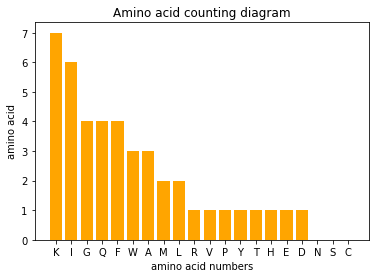

In [29]:
Seq = 'MGAIAKLVAKFGWPFIKKFYKQIMQFIGQGWTIDQIEKWLKRH'

num_R = Seq.count('R')
num_N = Seq.count('N')
num_D = Seq.count('D')
num_Q = Seq.count('Q')
num_E = Seq.count('E')
num_K = Seq.count('K')

num_H = Seq.count('H')
num_S = Seq.count('S')
num_T = Seq.count('T')
num_A = Seq.count('A')
num_C = Seq.count('C')
num_F = Seq.count('F')
num_G = Seq.count('G')
num_I = Seq.count('I')
num_L = Seq.count('L')
num_M = Seq.count('M')
num_P = Seq.count('P')
num_V = Seq.count('V')
num_W = Seq.count('W')
num_Y = Seq.count('Y')

df = pd.DataFrame(
   dict(
      hi_ = [num_R, num_N, num_D, num_Q, num_E, num_K, num_H, num_S, num_T, num_A, num_C, num_F, num_G, num_I, num_L, num_M, num_P, num_V, num_W, num_Y],
      bar_labels = ['R','N','D','Q','E', 'K', 'H', 'S', 'T', 'A', 'C', 'F', 'G', 'I', 'L', 'M', 'P', 'V', 'W', 'Y']
   )
)

df_sorted = df.sort_values('hi_', ascending=False)

plt.xlabel('amino acid numbers')
plt.ylabel('amino acid')
plt.title("Amino acid counting diagram")

plt.bar('bar_labels', 'hi_', data=df_sorted, color='orange')
plt.show()

In [17]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski,Draw

In [27]:
canonical_smiles = 'SLLSLIRKLIT'

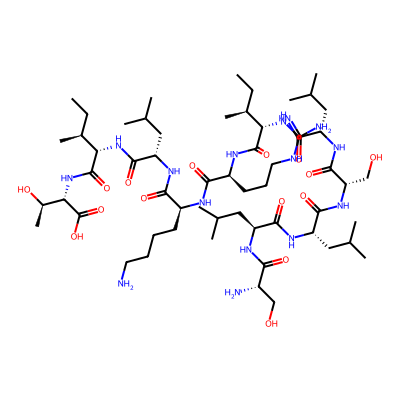

In [28]:
def draw_compound(canonical_smiles):
    pic = Chem.MolFromSequence(canonical_smiles)
    weight = Descriptors.MolWt(pic)
    return Draw.MolToImage(pic, size=(400,400))
picim = draw_compound(canonical_smiles)
picim

In [20]:
type(picim)

PIL.PngImagePlugin.PngImageFile